<h1><center>CSEN1022:Assignment 3</center></h1>
<h3><center>Winter 2021</center></h3>
<hr style="border:2px solid black"> </hr>

## <u> Please don't forget to fill in this data </u>
**Member 1**

Name: Ahmed Yasser Elgohary Hanafy

GUC-ID: 43-2906

Elective Tutorial No.: T-05

**Member 2**

Name: Omar Sameh Ali

GUC-ID: 43-1931

Elective Tutorial No.: T-02

<hr style="border:2px solid black"> </hr>

## Imports (Don't Edit)

In [1]:
# ONLY USE THESE IMPORTS.
# PLEASE DON'T EDIT THIS CELL.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Read Data

In [2]:
# X_train, X_test
# THE image categories are different.
x_train_airplane = np.array([plt.imread('Data/train/airplane/'+str(i)+'.jpg') for i in range (0,5000)])
x_train=x_train_airplane
y_train=np.repeat(0,5000)
x_test_airplane = np.array([plt.imread('Data/test/airplane/'+str(i)+'.jpg') for i in range (0,1000)])
x_test=x_test_airplane
y_test=np.repeat(0,1000)

x_train_bird = np.array([plt.imread('Data/train/bird/'+str(i)+'.jpg') for i in range (0,5000)])
x_train=np.concatenate((x_train,x_train_bird))
y_train=np.concatenate((y_train,np.repeat(1,5000)))
x_test_bird = np.array([plt.imread('Data/test/bird/'+str(i)+'.jpg') for i in range (0,1000)])
x_test=np.concatenate((x_test,x_test_bird))
y_test=np.concatenate((y_test,np.repeat(1,1000)))

x_train_truck = np.array([plt.imread('Data/train/truck/'+str(i)+'.jpg') for i in range (0,5000)])
x_train=np.concatenate((x_train,x_train_truck))
y_train=np.concatenate((y_train,np.repeat(2,5000)))
x_test_truck = np.array([plt.imread('Data/test/truck/'+str(i)+'.jpg') for i in range (0,1000)])
x_test=np.concatenate((x_test,x_test_truck))
y_test=np.concatenate((y_test,np.repeat(2,1000)))

X_train=np.reshape(x_train,(15000,32*32*3))
X_test=np.reshape(x_test,(3000,32*32*3))
X_train=np.array(X_train,dtype=np.int64)
X_test=np.array(X_test,dtype=np.int64)

<hr style="border:2px solid black"> </hr>

# Perform K means clustering for all 3 classes (Training Data).
### Return (memberships, centroids, dbi) --> (vector, matrix, scalar value).

In [3]:
###
#CODE HERE#
###
def KMeansClustering(X_train):
    p0=np.random.randint(low=0, high=14999)
    p1=np.random.randint(low=0, high=14999)
    p2=np.random.randint(low=0, high=14999)
    centre0 = X_train[p0]
    centre1 = X_train[p1]
    centre2 = X_train[p2]
    loop=True
    newC0=centre0.copy()
    newC1=centre1.copy()
    newC2=centre2.copy()
    oldCentroid=np.array([centre0,centre1,centre2],dtype=np.float64)
    newCentroid=np.array([newC0,newC1,newC2],dtype=np.float64)
    membership=np.zeros([15000])
    while loop:
        dist0 = np.linalg.norm(X_train - newCentroid[0],axis=1)
        dist1 = np.linalg.norm(X_train - newCentroid[1],axis=1)
        dist2 = np.linalg.norm(X_train - newCentroid[2],axis=1)

        for i in range(len(X_train)):
            if(dist0[i]<dist1[i] and dist0[i]<dist2[i]):
                membership[i]=0

            if(dist1[i]<dist0[i] and dist1[i]<dist2[i]):
                membership[i]=1

            if(dist2[i]<=dist0[i] and dist2[i]<=dist1[i]):
                membership[i]=2
        
        newCentroid[0]=X_train[membership==0].mean(axis=0)
        newCentroid[1]=X_train[membership==1].mean(axis=0)
        newCentroid[2]=X_train[membership==2].mean(axis=0)

        if (((newCentroid-oldCentroid)**2).sum()==0):
        # if(newCentroid==oldCentroid).all():
            loop=False
            break
        oldCentroid=newCentroid.copy()
    
    S_0=((np.linalg.norm(X_train[membership==0] - newCentroid[0],axis=1)).mean(axis=0))
    S_1=((np.linalg.norm(X_train[membership==1] - newCentroid[1],axis=1)).mean(axis=0))
    S_2=((np.linalg.norm(X_train[membership==2] - newCentroid[2],axis=1)).mean(axis=0))

    M_01=np.linalg.norm(newCentroid[0] - newCentroid[1])
    M_02=np.linalg.norm(newCentroid[0] - newCentroid[2])
    M_12=np.linalg.norm(newCentroid[1] - newCentroid[2])


    R01 = (S_0 + S_1)/M_01
    R02 = (S_0 + S_2)/M_02
    R12 = (S_1 + S_2)/M_12

    centroids=newCentroid

    dbi=np.array([R01,R02,R12]).max()

    return (membership,centroids,dbi)

# return (memberships, centroids, dbi)

<hr style="border:2px solid black"> </hr>

# Repeat the previous process 10 times. 
### Pick the membership vector and the centroids matrix corresponding to the best dbi.
##### Make sure you return max_counts and confusion_matrix.
(keep history in whatever datastructure you like).

In [4]:
res=[]
for i in range(10):
    res.append(KMeansClustering(X_train))

maximum=res[0]
for i in range(len(res)):
    if maximum[2]>res[i][2]:
        maximum=res[i]
membership=maximum[0]
centroids=maximum[1]


train_cluster=membership[:5000]
bird_cluster=membership[5000:10000]
truck_cluster=membership[10000:]

train=[len(train_cluster[train_cluster==0]),len(train_cluster[train_cluster==1]),len(train_cluster[train_cluster==2])]
bird=[len(bird_cluster[bird_cluster==0]),len(bird_cluster[bird_cluster==1]),len(bird_cluster[bird_cluster==2])]
truck=[len(truck_cluster[truck_cluster==0]),len(truck_cluster[truck_cluster==1]),len(truck_cluster[truck_cluster==2])]

max_counts=[max(train),max(bird),max(truck)]

centroid_train=centroids[train.index(max(train))]
centroid_bird=centroids[bird.index(max(bird))]
centroid_truck=centroids[truck.index(max(truck))]

dist0 = np.linalg.norm(X_test - centroid_train,axis=1)
dist1 = np.linalg.norm(X_test - centroid_bird,axis=1)
dist2 = np.linalg.norm(X_test - centroid_truck,axis=1)

prediction=np.zeros([3000])

for i in range(len(X_test)):
    if(dist0[i]<dist1[i] and dist0[i]<dist2[i]):
        prediction[i]=0

    if(dist1[i]<dist0[i] and dist1[i]<dist2[i]):
        prediction[i]=1
            
    if(dist2[i]<=dist0[i] and dist2[i]<=dist1[i]):
        prediction[i]=2


pred1=prediction[:1000]
pred2=prediction[1000:2000]
pred3=prediction[2000:3000]
(unique1, counts1) = np.unique(pred1, return_counts=True)
(unique2, counts2) = np.unique(pred2,return_counts=True)
(unique3, counts3) = np.unique(pred3,return_counts=True)
confusion_matrix=np.concatenate(([counts1],[counts2],[counts3]))

#best_membership_matrix = 
#best_centroids = 
#best_dbi = 

#max_counts = 
#confusion_matrix=

<hr style="border:2px solid black"> </hr>

## Don't Edit the Following Cells, Just Run & Save them.

Text(0.5, 1.0, 'Best Counts')

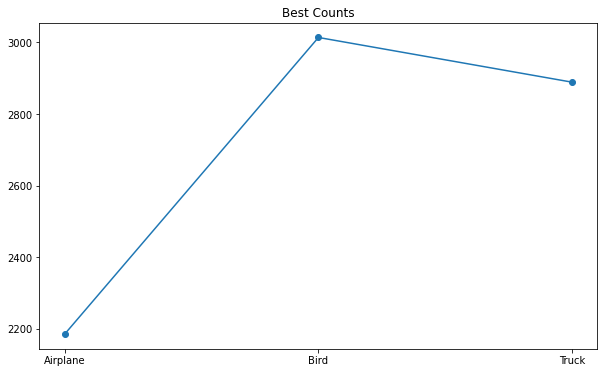

In [5]:
plt.figure(figsize=(10,6))
plt.plot(['Airplane','Bird','Truck'],max_counts,'-o')
plt.title('Best Counts')

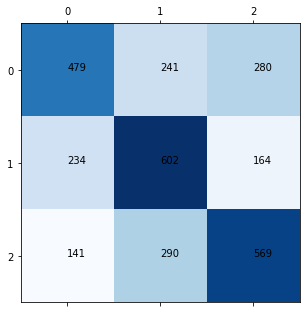

In [6]:
plt.rc('figure', figsize=[5,5])
plt.matshow(confusion_matrix,cmap="Blues")
for i in range(0,confusion_matrix.shape[0]):
    for j in range(0,confusion_matrix.shape[1]):
        plt.annotate(confusion_matrix[i,j],(j,i))